<a href="https://colab.research.google.com/github/AudryBarimbane/Python_Machine_Learning/blob/main/05_sklearn_cross_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris

(150, 4)


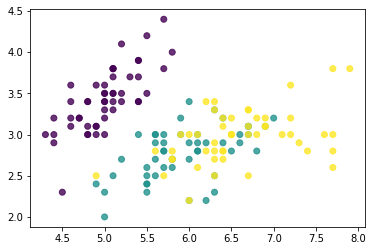

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:,1], c=y, alpha=0.8)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,LeaveOneOut,ShuffleSplit,StratifiedKFold,GroupKFold

In [24]:
#KFold   (attention aux classes déséquilibrées, bon pour régression)
cv  = KFold(5, random_state=0)
cross_val_score(KNeighborsClassifier(),X,y, cv=cv )



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ])

In [25]:
#LeaveOneOut (consommer beaucoup de puissance ordinateur)
cv = LeaveOneOut()
cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
#shuffle split (bonne alternative à k-Fold)

cv = ShuffleSplit(4, test_size=0.2)
cross_val_score(KNeighborsClassifier(),X, y, cv=cv)


array([0.96666667, 0.96666667, 0.96666667, 1.        ])

In [27]:
#stratified KFold  (choix par défaut , bon équilibre des classes)

cv =StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

In [29]:
#Group KFold (données dépendant d'un groupe)

cv= GroupKFold(5).get_n_splits(X, y, groups=X[:, 0])
cross_val_score(KNeighborsClassifier(), X , y, cv=cv)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])